# Prediction using Supervised ML

##### This is simple regression model task we can use both R and Python. we use python for our good understanding. 

## Simple  linear regression 

##### In this section we used the dataset that contains two variables (Hours and Scores). we will predict the scores of the student based upon there numbers of hours. 

#  The Sparks Foundation 
      
##       GRIPMAY21

## Muhammad Umair Aslam 

In [30]:
# we importing all liabraies that we used in this model 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline



In [5]:
# reading data from link
url = "http://bit.ly/w-data"
df = pd.read_csv (url)
print ("data imported successfully")


data imported successfully


In [6]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [8]:
df.shape

(25, 2)

In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#  Step 2 Visualizing of data

#### In this we will plot graph using matplot to visualize the data. 

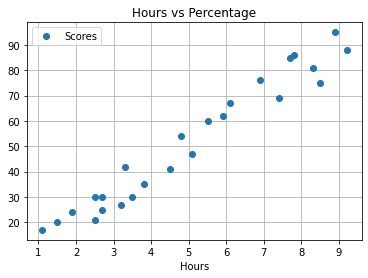

In [58]:
# plotting the graph 

df.plot (x= "Hours" , y = "Scores" , style = "o" , markersize = 6 )
plt.title ("Hours vs Percentage")
plt.grid()
plt.show()


 ### From the graph above we can clearly see that it is a POSITIVE linear relationship between the scores and hours of studied.

##### Now we can use machine learning model to predict the future values according to it. 

# Preparing the Data 

In [34]:
#we used iloc for the integers seperation.
X = df.iloc [:,:-1]. values 
Y = df.iloc [:,1:].values 


In [32]:
print (X)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]


In [35]:
print (Y)

[[21]
 [47]
 [27]
 [75]
 [30]
 [20]
 [88]
 [60]
 [81]
 [25]
 [85]
 [62]
 [41]
 [42]
 [17]
 [95]
 [30]
 [24]
 [67]
 [69]
 [30]
 [54]
 [35]
 [76]
 [86]]


In [37]:
# Splitting data into training and testing data
from sklearn.model_selection import train_test_split 
X_train,X_test,Y_train,Y_test = train_test_split (X,Y,test_size=0.2,random_state= 0 )


#### The above script splits 80% of the data to training set while 20% of the data to test set. The test_size variable is where we actually specify the proportion of test set.

## Training the Algorithm 

#### We have split our data into training and testing sets, and now is finally the time to train our algorithm.

In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit (X_train,Y_train)
print ("complete training ")


complete training 


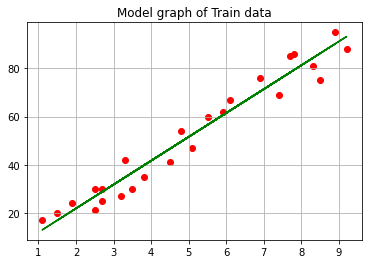

In [67]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

#plotting the graph of the training data
plt.scatter(X,Y,color= "red")
plt.plot (X,line,color= "green")
plt.title("Model graph of Train data")
plt.grid()
plt.show()


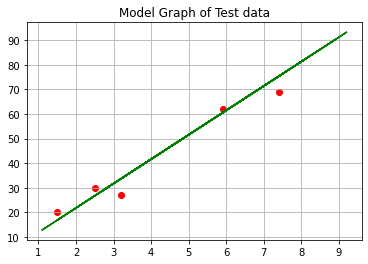

In [66]:
#plotting the graph of the test data 
plt.scatter (X_test,Y_test,color = "red")
plt.plot (X,line,color="green")
plt.title ("Model Graph of Test data")
plt.grid()
plt.show()

# Making Prediction 

### Now that we have trained our algorithm, it's time to make some predictions.

In [68]:
print (X_test)
y_pred= model.predict (X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [69]:
Y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [70]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [76]:
#Compairing actual Vs Predict
comp = pd.DataFrame ({"Actual" : [Y_test] , "Predict" : [y_pred]})
comp

,Actual,Predict
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [88]:
#testing with your own dataset
hours = 9.25
own_pred =model.predict([[hours]])
print ("The predicted score if a person studies for",hours,"hours is",own_pred[0])

The predicted score if a person studies for 9.25 hours is [93.69173249]


# Evaluting the model 

### *The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.*

In [90]:
from sklearn import metrics 
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, y_pred))

Mean Absolute Error: 4.183859899002975
